## <a href="https://gudhi.inria.fr/python/latest/">Doucumentation page</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gudhi as gd

## Random 3+1D field

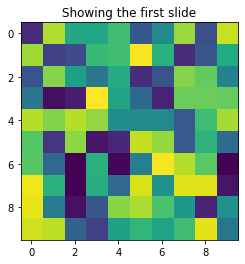

In [3]:
L = 10 # size
im = np.random.random((L,L,L))
plt.title('Showing the first slide')
plt.imshow(im[0]);

## Computing cubical complex persistence:

In [4]:
cc = gd.CubicalComplex(top_dimensional_cells=im)

In [5]:
cc.compute_persistence()

In [6]:
H0 = cc.persistence_intervals_in_dimension(0)
H1 = cc.persistence_intervals_in_dimension(1)
H2 = cc.persistence_intervals_in_dimension(2)

# Visualization:

usetex mode requires ghostscript.


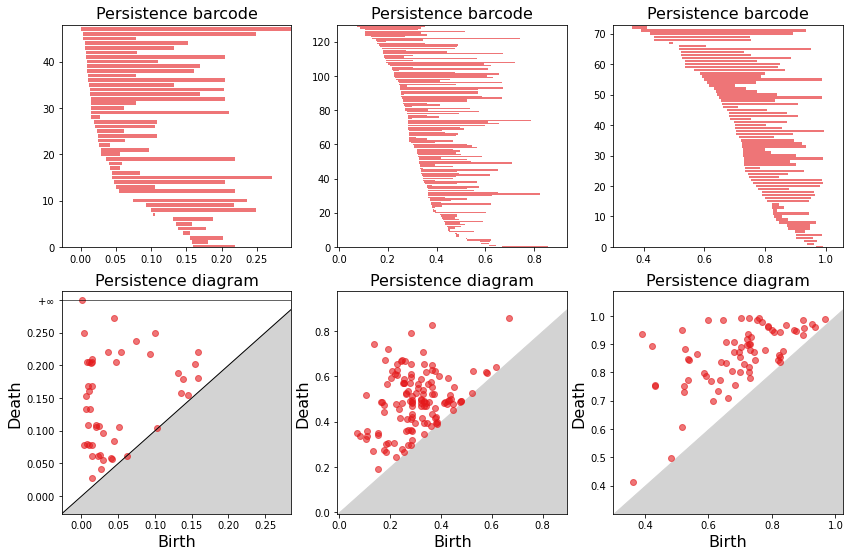

In [7]:
fig,ax = plt.subplots(2,3,figsize=(14,9)) 
gd.plot_persistence_barcode(H0, axes=ax[0][0])  # this plot could take a while.
gd.plot_persistence_barcode(H1, axes=ax[0][1])  # this plot could take a while.
gd.plot_persistence_barcode(H2, axes=ax[0][2])  # this plot could take a while.
gd.plot_persistence_diagram(H0, axes=ax[1][0])  # this plot could take a while, therefore we can use ripser to plot (see the next cell).
gd.plot_persistence_diagram(H1, axes=ax[1][1])  # this plot could take a while, therefore we can use ripser to plot (see the next cell).
gd.plot_persistence_diagram(H2, axes=ax[1][2]) ;# this plot could take a while, therefore we can use ripser to plot (see the next cell).

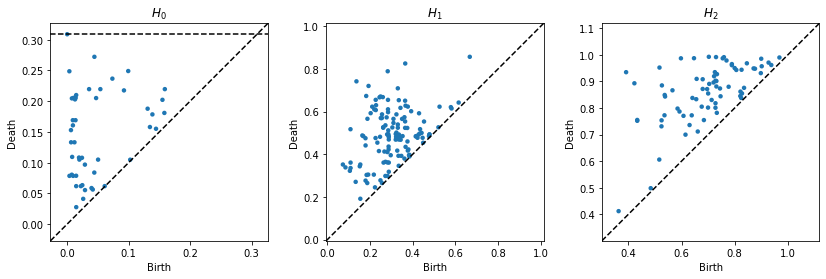

In [8]:
from persim import plot_diagrams # this plot is faster that the above's.
fig,ax = plt.subplots(1,3,figsize=(14,4)) 
plot_diagrams(H0, ax=ax[0], legend=False) ; ax[0].set_title(r'$H_0$')
plot_diagrams(H1, ax=ax[1], legend=False) ; ax[1].set_title(r'$H_1$')
plot_diagrams(H2, ax=ax[2], legend=False) ; ax[2].set_title(r'$H_2$');

## Betti curve, Silhouette, persistent entropy and persistent image

## <a href="https://gudhi.inria.fr/python/latest/representations.html">Gudhi representation</a>

In [9]:
from gudhi.representations import DiagramSelector, BettiCurve, Silhouette, Entropy, PersistenceImage

In [16]:
# some preprocessing to remove inf points.
H0 = DiagramSelector(use=True, point_type="finite")(H0)
H1 = DiagramSelector(use=True, point_type="finite")(H1)
H2 = DiagramSelector(use=True, point_type="finite")(H2)

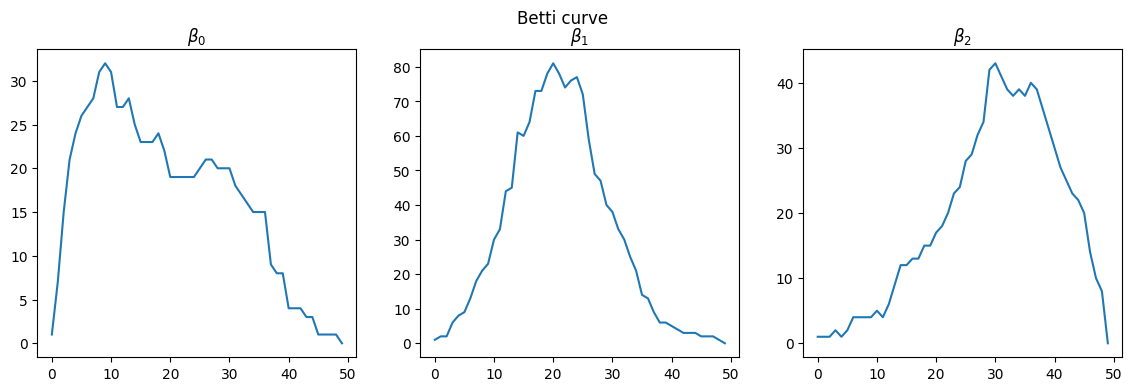

In [20]:
bc0 = BettiCurve(resolution=50)(H0)
bc1 = BettiCurve(resolution=50)(H1)
bc2 = BettiCurve(resolution=50)(H2)

fig,ax = plt.subplots(1,3,figsize=(14,4))
plt.suptitle('Betti curve')
ax[0].plot(bc0)
ax[0].set_title(r'$\beta_0$')
ax[1].plot(bc1)
ax[1].set_title(r'$\beta_1$')
ax[2].plot(bc2)
ax[2].set_title(r'$\beta_2$') ; 

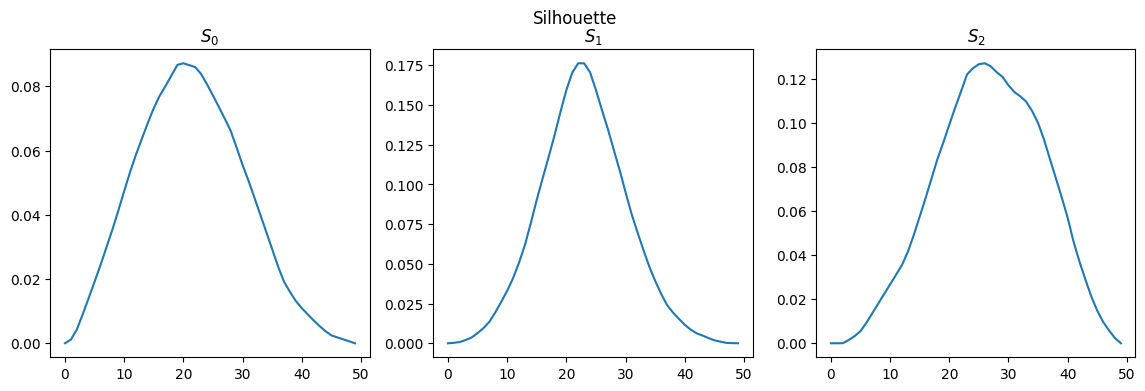

In [21]:
def pow(n):
  return lambda x: np.power(x[1]-x[0],n)

s0 = Silhouette(resolution=50, weight=pow(2))(H0)
s1 = Silhouette(resolution=50, weight=pow(2))(H1)
s2 = Silhouette(resolution=50, weight=pow(2))(H2)

fig,ax = plt.subplots(1,3,figsize=(14,4))
plt.suptitle('Silhouette')
ax[0].plot(s0) 
ax[0].set_title(r'$S_0$')
ax[1].plot(s1) 
ax[1].set_title(r'$S_1$')
ax[2].plot(s2) 
ax[2].set_title(r'$S_2$') ; 

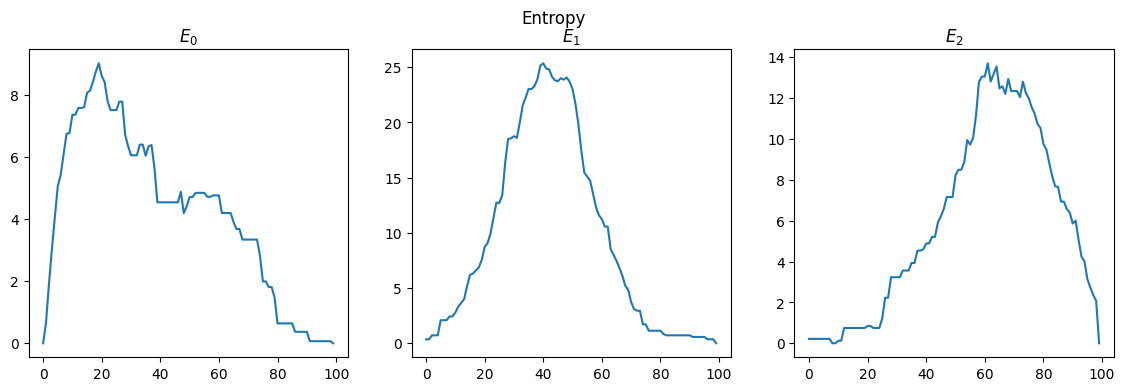

In [23]:
e0 = Entropy(mode='verctor', normalized=False)(H0)
e1 = Entropy(mode='verctor', normalized=False)(H1)
e2 = Entropy(mode='verctor', normalized=False)(H2)

fig,ax = plt.subplots(1,3,figsize=(14,4))
plt.suptitle('Entropy')
ax[0].plot(e0)  
ax[0].set_title(r'$E_0$')
ax[1].plot(e1) 
ax[1].set_title(r'$E_1$') 
ax[2].plot(e2) 
ax[2].set_title(r'$E_2$') ; 

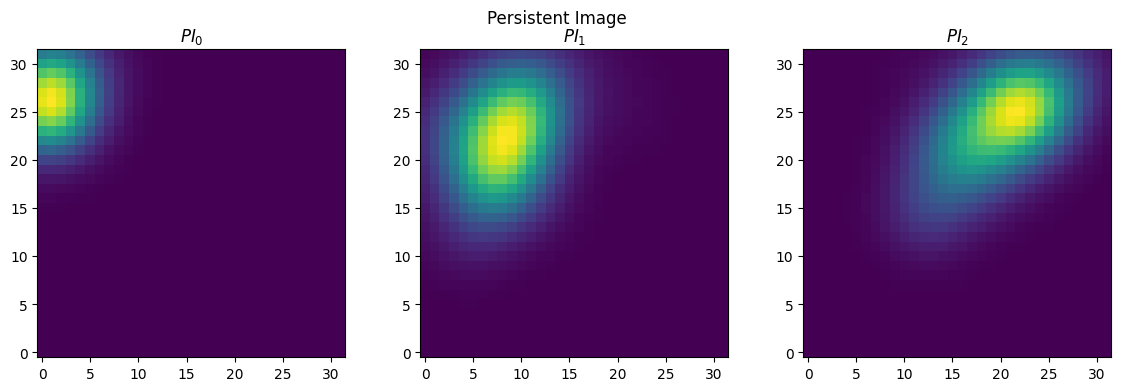

In [24]:
res = 32
pi0 = PersistenceImage(bandwidth=1e-1, weight=lambda x: x[1], im_range=[0,1,0,1], resolution=[res,res]).fit_transform([H0])
pi1 = PersistenceImage(bandwidth=1e-1, weight=lambda x: x[1], im_range=[0,1,0,1], resolution=[res,res]).fit_transform([H1])
pi2 = PersistenceImage(bandwidth=1e-1, weight=lambda x: x[1], im_range=[0,1,0,1], resolution=[res,res]).fit_transform([H2])

fig,ax = plt.subplots(1,3,figsize=(14,4))
plt.suptitle('Persistent Image')
ax[0].imshow(np.flip(np.reshape(pi0[0], [res,res]), 0), origin='lower') ; 
ax[0].set_title(r'$PI_0$') 
ax[1].imshow(np.flip(np.reshape(pi1[0], [res,res]), 0), origin='lower') ; 
ax[1].set_title(r'$PI_1$') 
ax[2].imshow(np.flip(np.reshape(pi2[0], [res,res]), 0), origin='lower') ; 
ax[2].set_title(r'$PI_2$') ; 